<a id='3.1'></a>

# SIADS 591-592 Milestone 1 Project

## Greenhouse Gas (GHG) Emissions from Upstream and Midstream US Oil and Gas Operations

By Rafee Shaik and Greg Myers
<br>April-May 2020


## Project Overview

* The purpose of this project is to examine established Greenhouse Gas (GHG) Emissions data and determine if there is a correlation between accelerated hydrocarbon (Crude oil and Natural gas) production through horizontal drilling and hydraulic fracturing in the most recent decade and GHG emissions rates. 
* If a correlation is found, additional analysis may be able to reveal the causal source. The project will focus on three GHGs, Carbon-Dioxide (CO2), Methane (CH4), and Nitrous-Oxide (N2O).


## Project Motivation: 
There has been an increase in US hydrocarbons production since the shale boom that started in 2007/2008 (Fig-1). US hydrocarbon production in the US increased steadily since then, this increase in production led to an increase in GHG emissions from Upstream and Midstream operations of Oil and Gas companies.

It is in every stakeholder's interest to control these emissions while optimizing the production. These stakeholders include the operating company, environmental protection agencies, and local and federal governments.

The goal of the study is to find any correlation between increased hydrocarbon production and industry sector GHG emissions? Does the correlation apply to the industry as a whole or one or more individual components?

This study can also lead to identifying the opportunities to improve the pipeline infrastructure and invest in pneumatic devices that can detect and prevent hydrocarbon emissions.

Both the project team members work in the Oil and Gas industry and are intrigued to find opportunities to reduce GHG emissions while optimizing the production.


## Data Sources:
1. <b>Greenhouse Gas Emissions Data</b>
<br><b>Source:</b> US Oil and Gas Upstream (Exploration & Production) and Midstream (Pipelines and Storage) facilities can be accessed from the U.S. Environmental Protection Agency (EPA) FLIGHT database.
<br><b>Location:</b> https://ghgdata.epa.gov/ghgp/main.do
<br><b>Access Method:</b> Facility Level Information on GreenHouse gases Tool (FLIGHT) database can be accessed through the website: https://ghgdata.epa.gov/ghgp/main.do Download the data in excel format after selecting appropriate filters.
<br><b>Format:</b>  Excel spreadsheets 
<br><b>Dataset Size:</b> Six excel spreadsheets with a total of 41K records.
<br><b>Time Period:</b> This data covers emissions from upsteam and midsteam Oil & Gas operations between 2011 and 2018.
<br>
2. <b> Crude Oil and Natural Gas Production </b>
<br><b>Name:</b> Crude Oil and Natural Gas Production
U.S. Field Production of Crude Oil, U.S. Natural Gas Gross Withdrawals; Yearly
<br><b>Source:</b> Energy Information Administration (EIA) datastore.
<br><b>Location:</b> https://www.eia.gov/opendata/qb.php?category=371
<br><b>Access Method:</b> API query
<br><b>Format:</b> JSON
<br><b>Dataset Size:</b> Crude records: 161; Gas records: 84; ~3 kilobytes each for crude and oil
<br><b>Time Period:</b> Crude production records from 1920 to 2019, Natural Gas production records from 1980 to 2019.

## Data Manipulation Methods:
### Processing Emissions Data:
1. CH4 and N2O emissions are represented in CO2 equivalent quantities.
2. Data is present in multiple sheets, a sheet for each year. Load each of these files into a separate data frame and flag what type of gas and which sector it is.
3. Aggregate the emission quantities by the parent company
4. Combine all the six datasets into a single data frame. Fill ‘NaN’ values with zero

### Processing Crude and Natural Gas Production volumes datasets:
1. Save API query results to a JSON file as an immutable source data reference.
2. Import JSON data (crude & gas) into Pandas data frames.
3. Perform Explode operations to separate date and production data.
4. Transform Date column into a DateTime data type.
5. Create and populate a product type column and drop unused columns.
6. Append crude and gas data frames (long-format).
7. Save the data frame in CSV format as a source for continued analysis.

### Data Integration:
Combine the above two datasets (Emissions and Production volumes) by the year, with this combined dataset we can compare greenhouse gas emission volumes with O&G production volumes.

## Analysis and Visualization

###### Summary of visualizations:
In this notebook we genearted 8 visualizations, seven of them are time-series line+scatter plots and a Summary table (fig-2) showing emissions from each company between 2011 and 2018.
* Fig-1: Trend line of total GHG emissions from US Oil and Gas Companies between 2011 and 2018.
* Fig-2: A table showing GHG Emissions from individual US Oil and Gas Producers between 2011 and 2018
* Fig-3: An Interactive chart - Emission trends between 2009 and 2018 from the top US emitters
* Fig-4: An Interactive chart to compare emissions between different companies and sectors
* Fig-5: A 4X4 Subplots to show, Emissions by sector, GHG Gas Type, Number of Operators(companies) in each sector and Total emissions
* Fig-6: An interactive chart to compare Emissions from Upstream and Midstream Sectors VS Crude Oil and Natural Gas Production
* Fig-7: A histogram to identify the common emission quantity range from US Oil & Gas companies
* Fig-8: A line chart with predicted 2019 GHG Emission

We prepared a linear regression model between between Hydrocarbon production and GHG emission volumes; We will use this model to estimate the future emissions based on production volume

## Data processing and Project Presentation workflow

Project report will be split into two jupyter notebooks.

1. Notebook <b>‘EmissionsDataPreparation.ipynb’</b> will concentrate on data acquisition and preparation (manipulation) for Visualizations and Analysis. Output of this notebook will be saved in several CSV(Comma Separated Values) files.
2. Notebook <b>‘EmissionsProject-Visualizations.ipynb’</b> will take the CSV files prepared by EmissionsDataPreparation.ipynb notebook and generate required visualizations and analysis.

###### Visualization Technique:
We used graph_objs library from plotly for all visualizations in this analysis.
* Most of our plots are scatter plots with line marks over time-series data.
* We used ipywidgets to add interactivity with the charts.

<b>Other libraries used:</b>
<br>Pandas, numpy, scipy, matplotlib, sklearn


In [1]:
# system libraries
import datetime
from datetime import timedelta
# Supress warnings
import warnings
warnings.filterwarnings('ignore')

# Libraries for data manipulation
import pandas as pd
import numpy as np

# Libraries for linear regression and calculating r-value.
import scipy as sp
from scipy import special
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# plotly imports - main graphics library
import plotly as py
import plotly.graph_objs as go
from plotly.subplots import make_subplots
# py.offline.init_notebook_mode(connected=True)

# ipywidgets for interactivity
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import HBox,VBox, Label

# import matplotlib as mpl
# import matplotlib.pyplot as plt
# %matplotlib inline

%config IPCompleter.greedy=True

Emissions_aggregatedData.csv is one of the main datasets for several visualizations in this analysis. Load the CSV file into a pandas data frame and select required columns used in various figures in the analysis

In [2]:
#Read data from csv file generated from 'EmissionsDataPreparation.ipynb' file.
df_EmissionByGasSec = pd.read_csv('Emissions_aggregatedData.csv',sep='|')

#Pickup required columns and rename them
Emissioncolumns = ['STANDARD_COMPANY_NAME','REPORTING YEAR',  'GAS', 'SECTOR', 'GHG_CONTRIBUTION', '2018_UPSTREAM_RANK', '2018_MIDSTREAM_RANK', '2018_OVERALL_RANK']
df_EmissionByGasSec = df_EmissionByGasSec[Emissioncolumns]
df_EmissionByGasSec=df_EmissionByGasSec.rename(columns={'STANDARD_COMPANY_NAME':'COMPANY', 'REPORTING YEAR':'REPORTING_YEAR'})

#Aggregate the data by Company, Year and Sector
df_aggByYearComp=df_EmissionByGasSec[['COMPANY','REPORTING_YEAR', 'SECTOR', 'GHG_CONTRIBUTION']]\
.groupby(['COMPANY','REPORTING_YEAR','SECTOR']).sum().reset_index()\
.sort_values('GHG_CONTRIBUTION',ascending=False)


#Assign a rank by their total emission in last 9 years
#Midstream rank
df_mid = df_aggByYearComp[df_aggByYearComp['SECTOR']=='Midstream']
df_mid=df_mid[['COMPANY','GHG_CONTRIBUTION']].groupby('COMPANY').sum().reset_index().sort_values('GHG_CONTRIBUTION',ascending=False)\
.reset_index().drop('index',axis=1).reset_index().rename(columns={'index':'MIDSTREAM_RANK'})
df_mid['MIDSTREAM_RANK']=df_mid['MIDSTREAM_RANK']+1
df_mid=df_mid.drop('GHG_CONTRIBUTION', axis=1)
#df_mid.head()

#Upstream rank
df_up = df_aggByYearComp[df_aggByYearComp['SECTOR']=='Upstream']
df_up=df_up[['COMPANY','GHG_CONTRIBUTION']].groupby('COMPANY').sum().reset_index()\
.sort_values('GHG_CONTRIBUTION',ascending=False)\
.reset_index().drop('index',axis=1).reset_index().rename(columns={'index':'UPSTREAM_RANK'})

df_up['UPSTREAM_RANK']=df_up['UPSTREAM_RANK']+1
df_up=df_up.drop('GHG_CONTRIBUTION', axis=1)
#df_up.head()


df_aggByYearComp=df_aggByYearComp.merge(df_mid,how='left', left_on='COMPANY', right_on='COMPANY').merge(df_up,how='left', left_on='COMPANY', right_on='COMPANY')

df_aggByYearComp['MIDSTREAM_RANK']=df_aggByYearComp['MIDSTREAM_RANK'].fillna(max(df_aggByYearComp['MIDSTREAM_RANK'])+1)
df_aggByYearComp['UPSTREAM_RANK']=df_aggByYearComp['UPSTREAM_RANK'].fillna(df_aggByYearComp['UPSTREAM_RANK'].max()+1)
df_aggByYearComp['GHG_CONTRIBUTION']=df_aggByYearComp['GHG_CONTRIBUTION'].astype(int)
df_aggByYearComp.head()

COMPANY  REPORTING_YEAR     SECTOR  GHG_CONTRIBUTION  \
0  ENERGY TRANSFER PARTNERS            2016  Midstream          16982839   
1  ENERGY TRANSFER PARTNERS            2018  Midstream          13645082   
2  ENERGY TRANSFER PARTNERS            2017  Midstream          11793393   
3                  WILLIAMS            2016  Midstream          11702910   
4                  WILLIAMS            2017  Midstream          11291678   

   MIDSTREAM_RANK  UPSTREAM_RANK  
0             4.0          430.0  
1             4.0          430.0  
2             4.0          430.0  
3             2.0           97.0  
4             2.0           97.0

<a id='fig-3_1'></a>

### Fig-3.1: Trend line of total GHG emissions from US Oil and Gas Companies between 2011 and 2018.

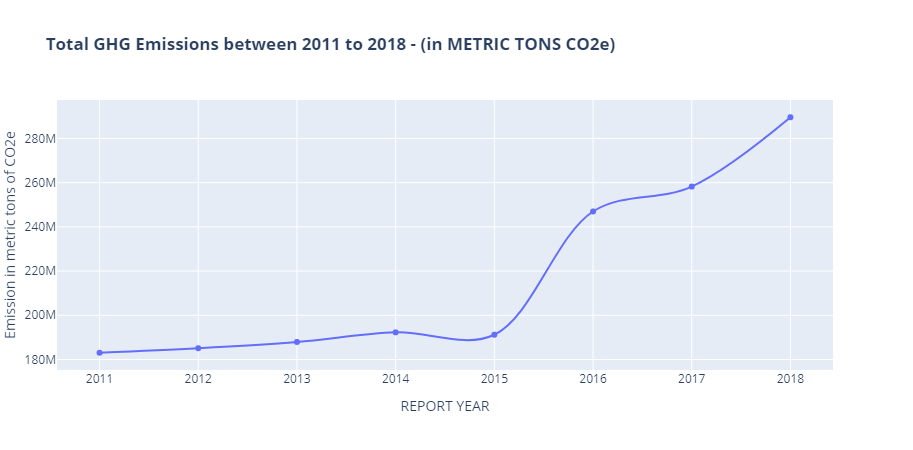

In [3]:
df_fig1=df_aggByYearComp[['REPORTING_YEAR','GHG_CONTRIBUTION']].groupby('REPORTING_YEAR').sum()\
.reset_index().sort_values('REPORTING_YEAR')

x=df_fig1.REPORTING_YEAR

layout=go.Layout(title='<b>Total GHG Emissions between 2011 to 2018 - (in METRIC TONS CO2e)</b>',
                 xaxis=dict(title='REPORT YEAR'),yaxis=dict(title='Emission in metric tons of CO2e'),
                 margin=dict(l=0)
                )
trace1 =  go.Scatter(x=x,
                     y=df_fig1.GHG_CONTRIBUTION,
                     mode = 'lines+markers',
                     name='Total Emission'
                     ,line = dict(shape='spline')
                    )
fig1 = go.Figure(data=[trace1], layout=layout)
py.offline.iplot(fig1)
#fig1.show()

Fig-1 shows the upwards trend in GHG Emissions from Oil & Gas upstream and midstream systems

<a id='fig-3_2'></a>

### Fig-3.2: A summary table showing GHG Emissions from the top US Oil and Gas Producers between 2011 and 2018

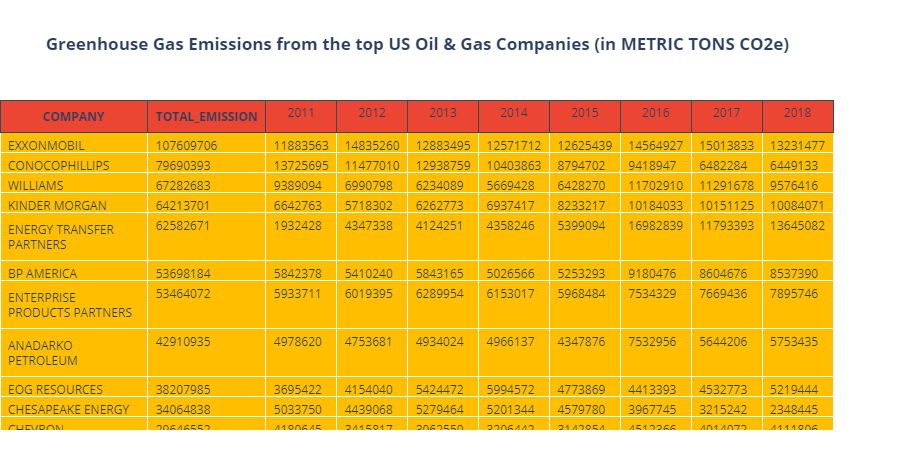

In [4]:
df_fig2=df_aggByYearComp[['COMPANY', 'REPORTING_YEAR', 'GHG_CONTRIBUTION']].groupby(['COMPANY', 'REPORTING_YEAR'])\
.sum().reset_index()\
.pivot_table(values='GHG_CONTRIBUTION',index='COMPANY',columns='REPORTING_YEAR').reset_index()

df_fig2.to_csv('PlotlyFig2.csv',index=False)
df_fig2=pd.read_csv('PlotlyFig2.csv')

df_fig2['TOTAL_EMISSION']=df_fig2.sum(axis=1)
df_fig2=df_fig2.sort_values('TOTAL_EMISSION', ascending=False).reset_index().drop('index',axis=1)

#Plotly table plot reference: https://plotly.com/python/table/

fig2 = go.Figure(data=[go.Table(columnwidth = [250,200,120,120,120,120,120,120,120,120],
    header=dict(values=['<b>COMPANY</b>', '<b>TOTAL_EMISSION</b>' ,'2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'],
                line_color='darkslategray',
                fill_color='rgb(235, 70, 52)',
                align='center'),
    cells=dict(values=[df_fig2['COMPANY'],df_fig2['TOTAL_EMISSION'],df_fig2['2011'],df_fig2['2012'],df_fig2['2013'],df_fig2['2014'],df_fig2['2015'],df_fig2['2016'],df_fig2['2017'],df_fig2['2018']],
               fill_color='rgb(255, 191, 0)',
               align='left'))
])
fig2.update_layout(title={'text':'<b>Greenhouse Gas Emissions from the top US Oil & Gas Companies (in METRIC TONS CO2e)</b>'},
                    #font=dict(#family="Courier New, monospace",size=18 #,color="#7f7f7f"),
                   width=1000,
                   margin=dict(l=0,b=20)
                  )

#fig2.show()
py.offline.iplot(fig2)

### Fig-3: An Interactive chart - Emission trends between 2009 and 2018 from the top US emitters

In [5]:
df_fig3=df_fig2.copy()
df_fig3=df_fig3[['COMPANY', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']]

x=['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']

layout3=go.Layout(title='<b>GHG Emission trends between 2009 and 2018 from the top US emittors</b>',
                  xaxis = dict(title = 'REPORT YEAR'),
                  yaxis = dict(title = 'Emission Quantity in Metric Tons (CO2e)'),
                  margin=dict(l=0)
                  )
# in this figure we're going to use ipywidgets 'interact' decorator for interactivity.
@interact(numComp=widgets.IntSlider(value=7,min=1,max=len(df_fig3.COMPANY.unique()), step=1,description='Top N Companies:',
                          disabled=False,
                          continuous_update=False,
                          orientation='horizontal',
                          readout=True,
                          readout_format='d'))
def update_fig(numComp):
    fig3=go.Figure(layout=layout3)
    for i in range(numComp):
        fig3.add_scatter(x=x,
                      y=df_fig3.loc[i][['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']],
                      mode='lines+markers',
                      name=df_fig3.loc[i]['COMPANY']
                     )
    fig3.show()


interactive(children=(IntSlider(value=7, continuous_update=False, description='Top N Companies:', max=678, min…

This chart can be used to compare GHG emissions between top US Oil and Gas companies from 2011 to 2018. 
<br>Companies are sorted in GHG emission volume descending order.
<br>Use the slider bar to select the number of companies to compare

### Fig-4: An Interactive chart to compare emissions between different companies and sectors

##### Widgets used:
1. Company - Dropdown - Multiple Selection
2. GAS - Checkbox
3. Sector - Checkbox
<br>Code reference: https://stackoverflow.com/questions/12096252/use-a-list-of-values-to-select-rows-from-a-pandas-dataframe

In [6]:
df_fig4=df_EmissionByGasSec.copy()
cols=['COMPANY', 'REPORTING_YEAR', 'GAS', 'SECTOR', 'GHG_CONTRIBUTION']
groupby_cols=['COMPANY','REPORTING_YEAR']

x=['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']

y_title='Emission Quantity in Metric Tons (CO2e)'

layout4=go.Layout(title='<b>Comparision of emissions from diffrent US Upstream and Midstream Oil & Gas companies</b>',
                yaxis = dict(title = y_title),
                xaxis = dict(title = 'Report Year')
                )
cols=['COMPANY', 'REPORTING_YEAR', 'GAS', 'SECTOR', 'GHG_CONTRIBUTION']
groupby_cols=['COMPANY','REPORTING_YEAR']

#Widgets
comp_selection=widgets.SelectMultiple(options=list(df_fig4.COMPANY.unique()), description='Company:')
sec_selection=widgets.SelectMultiple(options=list(df_fig4.SECTOR.unique()),  description='Sector:')
gas_selection=widgets.SelectMultiple(options=list(df_fig4.GAS.unique()), description='GHG Gas:')

container = widgets.HBox(children=[comp_selection,sec_selection,gas_selection])

trace1=go.Scatter(x=x, y=df_fig4[cols].groupby('REPORTING_YEAR').sum()['GHG_CONTRIBUTION'], name='All companies')
fig4=go.FigureWidget(trace1,layout=layout4)

#action method
def update_plot(change):
    yaxis_title=y_title
    df_fig4selection=df_fig4
    #Clean previous selection
    fig4.data=[]
    #filter sector selection - if nothing selected then we assume all sectors are selected
    if(len(sec_selection.value)==0):
        pass
    else:
        df_fig4selection = df_fig4selection[df_fig4selection['SECTOR'].isin(list(sec_selection.value))]

    #filter gas selection - If nothing selected then we assume all gases are selected
    if(len(gas_selection.value)==0):
        pass
    else:
        df_fig4selection = df_fig4selection[df_fig4selection['GAS'].isin(list(gas_selection.value))]

    #If no company is selected then we will plot a graph with all companies
    if (len(comp_selection.value)==0):
        fig4.add_scatter(x=x,
                           y=df_fig4selection[cols].groupby('REPORTING_YEAR').sum()['GHG_CONTRIBUTION'],
                           name='All companies'
                          )
    for company in comp_selection.value:
        fig4.add_scatter(x=x,
                           y=df_fig4selection[df_fig4selection['COMPANY']==company][cols].groupby(groupby_cols).sum()['GHG_CONTRIBUTION'],
                           name=company
                          )
comp_selection.observe(update_plot, names="value")
sec_selection.observe(update_plot, names="value")
gas_selection.observe(update_plot, names="value")
widgets.VBox([container,fig4])

This tool can be used Study of emission from multiple companies’ individual sectors and GHG gas types
<br>Use below interactive chart to drilldown into individual sectors and GHG gas types

### Fig 5: A 4X4 Subplots to show
    1. Emission by sector
    2. Emissions by GHG Gas Type
    3. Number of operators by sector and total operators
    4. Total emissions

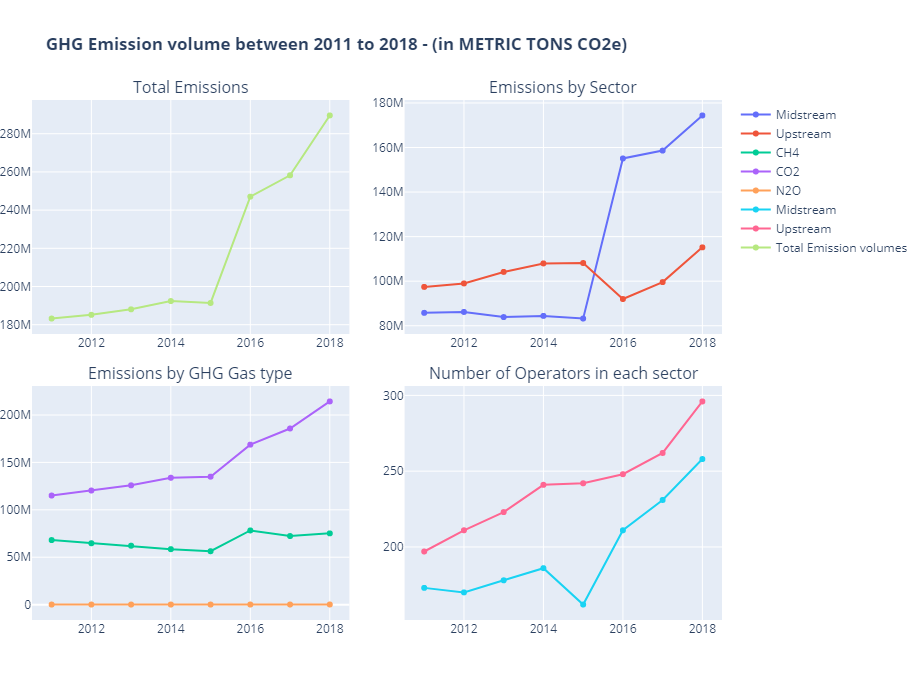

In [7]:
df_fig5=df_EmissionByGasSec[cols]
# Sector wise emissions
df_fig5_sec=df_fig5[['SECTOR','REPORTING_YEAR','GAS','GHG_CONTRIBUTION']].groupby(['SECTOR','REPORTING_YEAR']).sum().reset_index()

fig5 = make_subplots(
    rows=2, cols=2,specs = [[{}, {}],[{}, {}]], horizontal_spacing = 0.08,vertical_spacing=0.1,
    subplot_titles=("Total Emissions", "Emissions by Sector", "Emissions by GHG Gas type", "Number of Operators in each sector"))

# Emission by sector
for sec in df_fig5_sec.SECTOR.unique():
    trace=go.Scatter(x=x, y=df_fig5_sec[df_fig5_sec['SECTOR']==sec]['GHG_CONTRIBUTION'],name=sec)
    fig5.add_trace(trace, row=1, col=2)

# Emission by GAS type
df_fig5_gas = df_fig5[['SECTOR','GAS','REPORTING_YEAR','GHG_CONTRIBUTION']].groupby(['GAS','REPORTING_YEAR']).sum().reset_index()
for gas in df_fig5_gas.GAS.unique():
    trace=go.Scatter(x=x, y=df_fig5_gas[df_fig5_gas['GAS']==gas]['GHG_CONTRIBUTION'],name=gas)
    fig5.add_trace(trace, row=2, col=1)


#Number of operators
df_fig5_oper=df_fig5[['COMPANY','SECTOR','REPORTING_YEAR']]\
.groupby(['COMPANY','SECTOR','REPORTING_YEAR']).count().reset_index()\
.groupby(['SECTOR','REPORTING_YEAR']).count().reset_index()

operTraceList=[]
for sec in df_fig5_oper.SECTOR.unique():
    trace=go.Scatter(x=x, y=df_fig5_oper[df_fig5_oper.SECTOR==sec]['COMPANY'], name=sec)
    fig5.add_trace(trace, row=2, col=2)

#Total emission
trace_totals = go.Scatter(x=x, y=df_EmissionByGasSec[['REPORTING_YEAR','GHG_CONTRIBUTION']].groupby('REPORTING_YEAR').sum().reset_index().GHG_CONTRIBUTION,name='Total Emission volumes')
fig5.add_trace(trace_totals, row=1, col=1)

fig5.update_layout(title='<b>GHG Emission volume between 2011 to 2018 - (in METRIC TONS CO2e)</b>',
                   height=700,
                   margin=dict(l=0)
                  )
fig5.show()

### Fig- 6: An interactive chart to compare Emissions from Upstream and Midstream Sectors VS Crude Oil and Natural Gas Production

#### With this graph we can compare 
1. Natural Gas Production vs Midstream Emissions
2. Crude Oil Production vs Upstream Emissions
3. Natural Gas Production vs Upstream Emissions
4. Crude Oil Production vs Midstream Emissions
5. Overall Hydrocarbon Production vs Emission from both Upstream and Midstream sectors

In [8]:
df_ProdVsEm=pd.read_csv('ProductionVsEmissionSplit.csv',sep='|')

prodList=list(df_ProdVsEm[df_ProdVsEm.Key.str.contains('Production')].Key.unique())
emiList=list(df_ProdVsEm[df_ProdVsEm.Key.str.contains('Emission')].Key.unique())

x=['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']

layout6=go.Layout(title='<b>Oil and Gas Production vs GHG Emissions from Upstream and Midstream sectors</b>',
                xaxis = dict(title = 'Report Year')
                )

@interact(prod_selection=widgets.SelectMultiple(options=prodList, description='Product:'), emi_selection=widgets.SelectMultiple(options=emiList, description='Sector:'))
def update_fig6(prod_selection, emi_selection):
    fig6 = make_subplots(specs=[[{"secondary_y": True}]])
    if(len(prod_selection)==0):
        prodsel=prodList
    else:
        prodsel=prod_selection

    for prod in prodsel:
        fig6.add_trace(go.Scatter(x=x, y=df_ProdVsEm[df_ProdVsEm.Key==prod]['Value'],name=prod),secondary_y=False, )

    if(len(emi_selection)==0):
        emisel=emiList
    else:
        emisel=emi_selection

    for emi in emisel:
        fig6.add_trace(go.Scatter(x=x, y=df_ProdVsEm[df_ProdVsEm.Key==emi]['Value'],name=emi),secondary_y=True, )

    fig6.update_layout(layout6)
    fig6.update_yaxes(title_text="Production Volume in kBOE", secondary_y=False)
    fig6.update_yaxes(title_text="GHG Emissions in Metric Tons CO2e", secondary_y=True)
    fig6.show()

interactive(children=(SelectMultiple(description='Product:', options=('Combined Production', 'Crude Production…

### Fig-7: A histogram to identify the common emission quantity range from US Oil & Gas companies

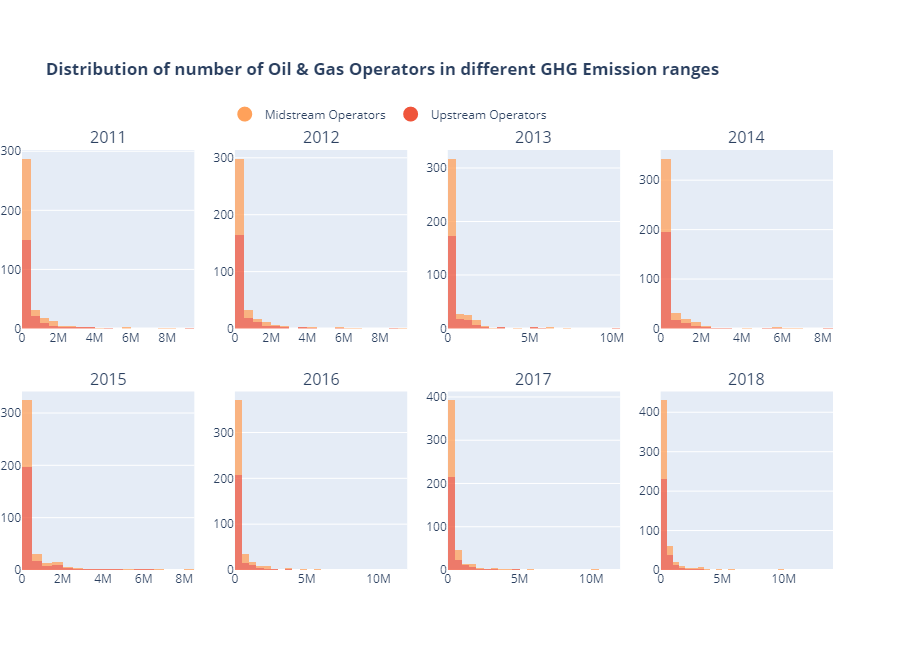

In [9]:
df_fig7=df_aggByYearComp.copy(deep=True)
df_fig7 = df_fig7[df_fig7.GHG_CONTRIBUTION>=0]

fig7 = make_subplots(
    rows=2, cols=4,specs = [[{}, {},{}, {}],[{}, {},{}, {}]], horizontal_spacing = 0.05,vertical_spacing=0.15,
    subplot_titles=('2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'))

for year in range(2011, 2019,1):
    trace_up=go.Histogram(x=df_aggByYearComp[(df_aggByYearComp['REPORTING_YEAR']==year) & (df_aggByYearComp['SECTOR']=='Upstream')]['GHG_CONTRIBUTION'],
                          #histnorm='probability', # enable the option to see the normalized histogram
                          opacity=0.75,
                          name='Upstream Operators',
                          xbins=dict(start=0, end=15000000, size=500000),
                          marker_color='#EF553B',
                          showlegend=False
                         )
    trace_mid=go.Histogram(x=df_aggByYearComp[(df_aggByYearComp['REPORTING_YEAR']==year) & (df_aggByYearComp['SECTOR']=='Midstream')]['GHG_CONTRIBUTION'],
                           #histnorm='probability',
                           opacity=0.75,
                           name='Midstream Operators',
                           xbins=dict(start=0, end=15000000, size=500000),
                           marker_color='#FFA15A',
                           showlegend=False
                          )
    fig7.add_trace(trace_up,row=year%2011//4+1, col=year%2011%4+1 )
    fig7.add_trace(trace_mid,row=year%2011//4+1, col=year%2011%4+1 )

fig7.add_trace(go.Scatter(x=[None], y=[None],
                          mode='markers',
                          marker=dict(size=15, color='#EF553B'),
                          showlegend=True, name='Upstream Operators'),row=1,col=1
              )
fig7.add_trace(go.Scatter(x=[None], y=[None],
                          mode='markers',
                          marker=dict(size=15, color='#FFA15A'),
                          showlegend=True, name='Midstream Operators'),row=1,col=1
              )
layout=go.Layout(title=dict(text='<b>Distribution of number of Oil & Gas Operators in different GHG Emission ranges</b>')
                 ,barmode='stack'
                 #barmode='overlay'
                 ,margin=dict(l=0,t=150)
                 ,legend_orientation="h"
                 ,legend=dict(x=.25, y=1.12)
                 ,height=650
                )
fig7.update_layout(layout )

Most of the Oil and Gas companies emit less then 500K metric tons of GHG gases. There are very few companiew producing over 5 million tons of GHG gases

## A linear regression analysis between emission quantity and production volumes

In [10]:
df_ProdVsEm=pd.read_csv('ProductionVsEmissionSplit.csv',sep='|')
df_regress=df_ProdVsEm.pivot_table(values='Value',index='REPORTING_YEAR',columns='Key').reset_index()
df_regress

Key  REPORTING_YEAR  Combined Emission  Combined Production  Crude Production  \
0              2011       1.830546e+08         7.008380e+06         2068316.0   
1              2012       1.851053e+08         7.497705e+06         2385704.0   
2              2013       1.879298e+08         7.770173e+06         2734901.0   
3              2014       1.922709e+08         8.546693e+06         3207206.0   
4              2015       1.912030e+08         9.032806e+06         3445138.0   
5              2016       2.469540e+08         8.762416e+06         3235183.0   
6              2017       2.582257e+08         9.050747e+06         3413418.0   
7              2018       2.895697e+08         1.028334e+07         4011519.0   
8              2019                NaN         1.132795e+07         4464530.0   

Key  Midstream Emission  Natural Gas Production  Upstream Emission  
0          8.562329e+07            4.940064e+06       9.743134e+07  
1          8.611809e+07            5.112001e+06       9.898723e+07  
2          8.377243e+07            5.035272e+06       1.041574e+08  
3          8.430608e+07            5.339487e+06       1.079649e+08  
4          8.305148e+07            5.587668e+06       1.081515e+08  
5          1.549717e+08            5.527233e+06       9.198234e+07  
6          1.586330e+08            5.637329e+06       9.959268e+07  
7          1.743933e+08            6.271824e+06       1.151765e+08  
8                   NaN            6.863423e+06                NaN

In [11]:
#Feature selction
r2Prod_cols = ['Combined Production', 'Crude Production', 'Natural Gas Production']
r2Emi_cols = ['Combined Emission', 'Midstream Emission', 'Upstream Emission']

df_r2=df_regress[df_regress['REPORTING_YEAR']<2019]
for prdcol in r2Prod_cols:
    for emicol in r2Emi_cols:
        slope, intercept, r_value, p_value, std_err=sp.stats.linregress(df_r2[prdcol],df_r2[emicol])
        print('Product:',prdcol,', Sector:',emicol ,', r-value:',r_value)

Product: Combined Production , Sector: Combined Emission , r-value: 0.8188805549463553
Product: Combined Production , Sector: Midstream Emission , r-value: 0.7307647590768765
Product: Combined Production , Sector: Upstream Emission , r-value: 0.5836843921994618
Product: Crude Production , Sector: Combined Emission , r-value: 0.7618953778846275
Product: Crude Production , Sector: Midstream Emission , r-value: 0.672315930334268
Product: Crude Production , Sector: Upstream Emission , r-value: 0.5850816693652079
Product: Natural Gas Production , Sector: Combined Emission , r-value: 0.8698936221820065
Product: Natural Gas Production , Sector: Midstream Emission , r-value: 0.7874234776407911
Product: Natural Gas Production , Sector: Upstream Emission , r-value: 0.558452009547544


###### From the above analysis, we observed a higher correlation between Natural Gas Production and Combined Emission (Upstream and Midstream)

### Estimating combined emission quantity (upstream and midstream) for the year 2019 from Natural Gas production volume

###### Since we have only 8 datapoints to run the linear regression we are going to use all datapoints to train the model.

In [12]:
def emissionRegression(df_X, target_y,emission_X_pred):
    regr = linear_model.LinearRegression()
    regr.fit(df_X, target_y)
    emission_y_pred = regr.predict(emission_X_pred)
    #print('Predicted value of Combined Emission from key ',emission_X_pred ,' is :',emission_y_pred)
    return emission_y_pred

In [13]:
df_train = df_regress[df_regress['REPORTING_YEAR']<2019]
test=df_regress[df_regress['REPORTING_YEAR']==2019]

independent_cols=['Natural Gas Production']

X=df_train[independent_cols]
y=df_train['Combined Emission']

estimated_emi_2019=emissionRegression(X.values, y ,test[independent_cols].values)
print(estimated_emi_2019[0])

337657837.66728234


In [14]:
#df_predicted[df_predicted['REPORTING_YEAR']==2019]['Combined Emission']=estimated_emi_2019
df_predicted=df_regress.copy(deep=True)
df_predicted.at[8,'Combined Emission']=estimated_emi_2019

In [15]:
df_predicted

Key  REPORTING_YEAR  Combined Emission  Combined Production  Crude Production  \
0              2011       1.830546e+08         7.008380e+06         2068316.0   
1              2012       1.851053e+08         7.497705e+06         2385704.0   
2              2013       1.879298e+08         7.770173e+06         2734901.0   
3              2014       1.922709e+08         8.546693e+06         3207206.0   
4              2015       1.912030e+08         9.032806e+06         3445138.0   
5              2016       2.469540e+08         8.762416e+06         3235183.0   
6              2017       2.582257e+08         9.050747e+06         3413418.0   
7              2018       2.895697e+08         1.028334e+07         4011519.0   
8              2019       3.376578e+08         1.132795e+07         4464530.0   

Key  Midstream Emission  Natural Gas Production  Upstream Emission  
0          8.562329e+07            4.940064e+06       9.743134e+07  
1          8.611809e+07            5.112001e+06       9.898723e+07  
2          8.377243e+07            5.035272e+06       1.041574e+08  
3          8.430608e+07            5.339487e+06       1.079649e+08  
4          8.305148e+07            5.587668e+06       1.081515e+08  
5          1.549717e+08            5.527233e+06       9.198234e+07  
6          1.586330e+08            5.637329e+06       9.959268e+07  
7          1.743933e+08            6.271824e+06       1.151765e+08  
8                   NaN            6.863423e+06                NaN

### Fig-8: Plot predicted 2019 GHG Emission on a time-series line chart

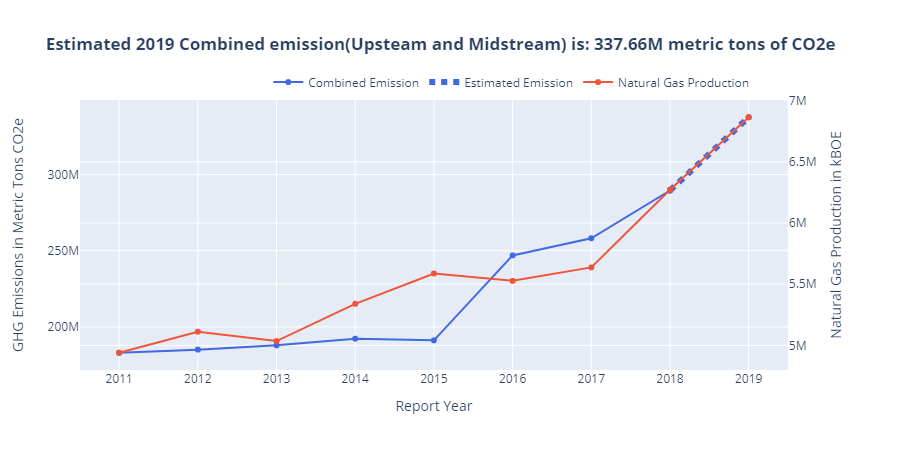

In [16]:
fig8=make_subplots(specs=[[{"secondary_y": True}]])

#Emissions line till 2018.
#df_predicted[df_predicted['REPORTING_YEAR']<=2018]
fig8.add_trace(go.Scatter(x=df_predicted[df_predicted['REPORTING_YEAR']<=2018]['REPORTING_YEAR'],
                          y=df_predicted[df_predicted['REPORTING_YEAR']<=2018]['Combined Emission'],
                          name='Combined Emission',
                          line=dict(color='royalblue')
                         ),secondary_y=False)
#Emissions line from 2018 to 2019.
fig8.add_trace(go.Scatter(x=df_predicted[df_predicted['REPORTING_YEAR']>=2018]['REPORTING_YEAR'],
                          y=df_predicted[df_predicted['REPORTING_YEAR']>=2018]['Combined Emission'],
                          name='Estimated Emission',
                          line=dict(color='royalblue', width=6, dash='dot')
                         ),secondary_y=False)
fig8.add_trace(go.Scatter(x=df_predicted['REPORTING_YEAR'],
                          y=df_predicted['Natural Gas Production'],
                          name='Natural Gas Production',
                          line=dict(color='#EF553B')
                         ),secondary_y=True)

title='<b>Estimated 2019 Combined emission(Upsteam and Midstream) is: ' +str(round(estimated_emi_2019[0]/1000000,2))+'M metric tons of CO2e</b>'
layout8=go.Layout(title=title,
                xaxis = dict(title = 'Report Year')
                )
fig8.update_layout(layout8
                 ,legend_orientation="h"
                 ,legend=dict(x=.25, y=1.12))
fig8.update_yaxes(title_text="GHG Emissions in Metric Tons CO2e", secondary_y=False)
fig8.update_yaxes(title_text="Natural Gas Production in kBOE", secondary_y=True)

fig8.show()

In [17]:
df_production=pd.read_csv('Processed_AnnualProductionData.csv',sep='|')

In [18]:
#df_production=df_production[df_production['Date']>1980]

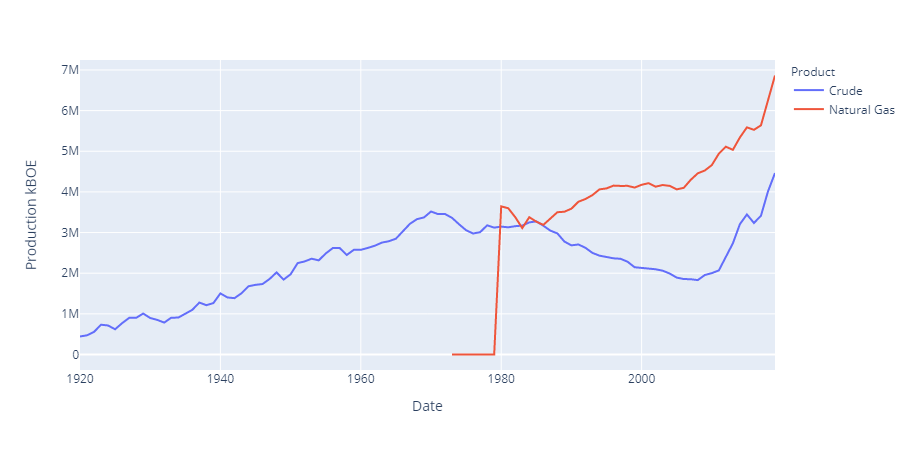

In [19]:
import plotly.express as px

fig = px.line(df_production, x="Date", y="Production kBOE", color='Product')
fig.show()